# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [1]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [3]:
feat_df <- read.table("../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/one_wayANOVA_hMinImp_TICnorm_groupFil0.3_RPneg_fullreport.csv"
        ,row.names = 1, header = TRUE, sep = ',')

In [4]:
head(feat_df)

,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10,17.50701,18.11533,18.20446,17.70459,0.60832246,0.69745412,0.19758450,0.089131654,-0.4107380,-0.4998696,0.4806292,0.713238460,0.78297081,0.92488104,0.9990481,0.80749231,0.87741665,0.990074219,0.743669604,1.0000000,1,1,1.0000000,1.00000000,1.0000000,16.94364,18.46554,18.11010,18.12056,18.06150,18.34743,16.94364,18.07038,17.98012,18.11866,18.21712
F100,19.40004,17.42704,17.21097,16.79412,-1.97300335,-2.18906877,-2.60592325,-0.216065418,-0.6329199,-0.4168545,0.5446416,0.677487346,0.75960183,0.99071385,0.9996130,0.81190586,0.99726731,0.671148179,0.765295013,1.0000000,1,1,1.0000000,1.00000000,1.0000000,16.84709,16.74115,19.66737,15.18671,19.23523,15.18671,20.25563,18.54446,17.84755,16.85690,15.18671
F1000,18.70738,18.72188,18.73066,19.12033,0.01449614,0.02327323,0.41294557,0.008777088,0.3984494,0.3896723,11.4125828,0.019787965,0.13076606,0.03005019,0.9995202,0.99786490,0.03239841,0.026604471,0.991428312,0.2560623,1,1,0.2843019,0.19350154,1.0000000,19.17408,19.06658,18.63766,18.80609,18.73182,18.72949,18.77137,18.64340,18.57825,18.47179,18.43940
F10000,19.76419,18.80072,18.96675,19.30923,-0.96347825,-0.79744206,-0.45496395,0.166036192,0.5085143,0.3424781,0.1882932,0.899254650,0.92089343,0.98093339,0.9992834,0.89437723,0.99389821,0.986113010,0.934689461,1.0000000,1,1,1.0000000,1.00000000,1.0000000,20.68696,17.93150,19.66993,17.93150,20.00200,17.93150,19.41160,20.11679,19.19175,17.93150,18.92166
F10004,24.21570,24.15581,24.09963,24.28254,-0.05988750,-0.11607349,0.06683994,-0.056185992,0.1267274,0.1829134,0.1232617,0.941582413,0.95531191,0.97559516,0.9976924,0.99721339,0.93388653,0.996147793,0.980943939,1.0000000,1,1,1.0000000,1.00000000,1.0000000,24.34201,24.22307,24.45196,23.85966,24.42813,23.77112,24.25452,24.17688,23.94397,24.22769,24.37852
F10005,17.96977,19.69944,20.49473,21.21931,1.72967010,2.52495339,3.24953895,0.795283298,1.5198688,0.7245856,27.2914255,0.004004406,0.06292029,0.05200933,0.2911744,0.03405868,0.34860417,0.003497835,0.008977772,0.3178667,1,1,0.8783993,0.08093424,0.5412314,21.18068,21.25794,19.55351,19.84537,20.95677,20.03268,17.74737,18.19217,18.94083,18.92075,19.62918


In [5]:
meta_df <- read.table("../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',')

In [6]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [7]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8trans|CD8TD)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [8]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

# Define filtering level - FDR control

In [9]:
filtered_level = 0.05
feat_df.filt = feat_df[feat_df$padj < filtered_level & !is.na(feat_df$padj),]

In [10]:
dim(feat_df.filt)

[1] 424  36

## subset datatable with only data values

In [11]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [12]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [13]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.886046  1.937328

#### columns and rows annotation

In [14]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [15]:
unique(meta_df$group)

[1] "Blank"     "Blank_std" "Qstd"      "pooled"    "Tn"        "CD8stem"  
[7] "CD8trans"  "CD8TD"

## Since the metadata is not exclusively the data 

In [16]:
sample_names

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

In [17]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

In [18]:
meta_df

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
7,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B1,5
8,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B2,5
11,Unknown,MT_20230308_016,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B5,5
12,Unknown,MT_20230308_018,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B6,5
14,Unknown,MT_20230308_022,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B7,5
15,Unknown,MT_20230308_024,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B8,5
16,Unknown,MT_20230308_026,CD8T_TD_750k_01_02,CD8TD_750K_1,750000,CD8TD,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B9,5
17,Unknown,MT_20230308_028,CD8T_TD_750k_01_02,CD8TD_750K_2,750000,CD8TD,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:C1,5


In [19]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [20]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [21]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [22]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [23]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [24]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [25]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [26]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [27]:
group

Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

In [28]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [29]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.886046  1.937328

In [30]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2

In [31]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.886046  1.937328

In [32]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [33]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [34]:
out_dir = "../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/heatmap/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_padj{filtered_level}_heatmap.pdf"))

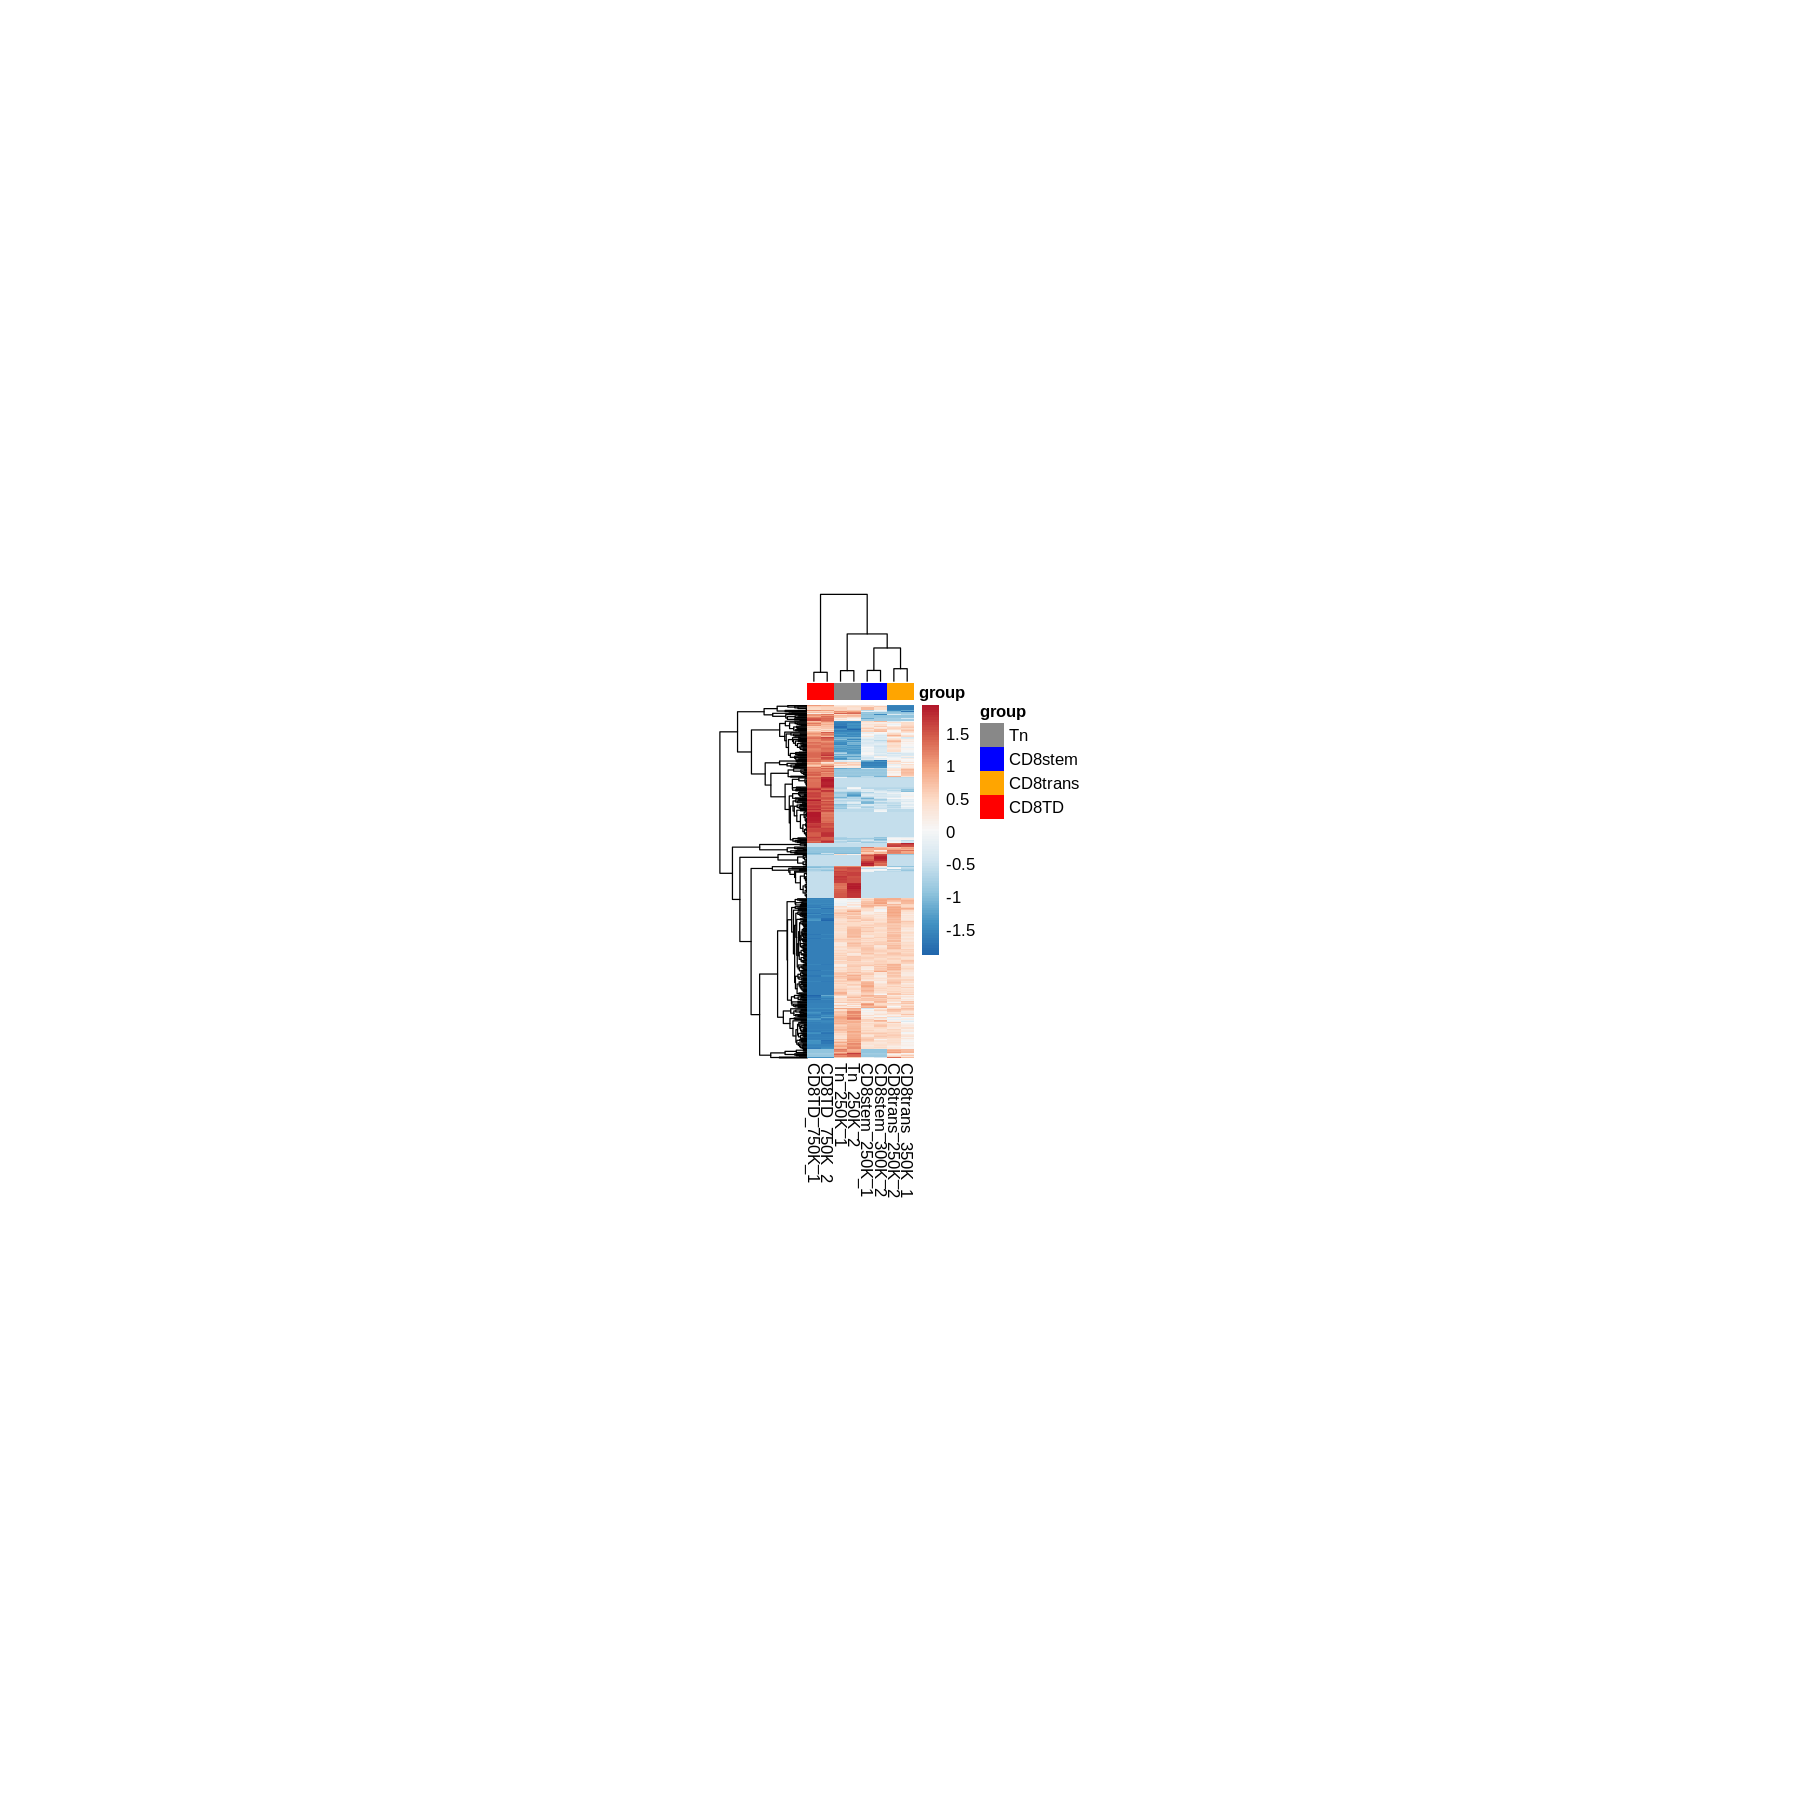

In [35]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = FALSE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 0.5,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----